# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

  Using cached https://files.pythonhosted.org/packages/3b/d0/59721d0f3954781488aac17ee4a40412d0a3547e98bb16377a09c39a2807/citipy-0.0.5.tar.gz
  Using cached https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559708 sha256=1c1ab801b754bd3c0ee2f93061c1e1a7892f37209b012e58c2b0aed214301b90
  Stored in directory: C:\Users\clayt\AppData\Local\pip\Cache\wheels\6f\07\0d\0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy as owm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create dataframe for storing data
cities_df = pd.DataFrame()

# Make columns in dataframe
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["City"] = ""
cities_df["Country"] = ""

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
cities


['punta arenas',
 'arraial do cabo',
 'roma',
 'bushenyi',
 'samusu',
 'manadhoo',
 'butaritari',
 'okhotsk',
 'northam',
 'rikitea',
 'taolanaro',
 'port elizabeth',
 'general pico',
 'kavaratti',
 'saint-paul-les-dax',
 'new norfolk',
 'cape town',
 'mataura',
 'zasheyek',
 'georgetown',
 'albany',
 'bell ville',
 'profitis ilias',
 'faanui',
 'ushuaia',
 'illoqqortoormiut',
 'pangnirtung',
 'elizabethtown',
 'kodiak',
 'kapaa',
 'hithadhoo',
 'zhigansk',
 'dikson',
 'walvis bay',
 'puerto ayora',
 'longyearbyen',
 'clyde river',
 'dhamrai',
 'necochea',
 'kutum',
 'bluff',
 'vaini',
 'gornopravdinsk',
 'lebu',
 'salalah',
 'neropolis',
 'nikolskoye',
 'port-gentil',
 'monrovia',
 'ust-maya',
 'gat',
 'luanda',
 'avarua',
 'awjilah',
 'narsaq',
 'carnarvon',
 'hermanus',
 'saskylakh',
 'laguna',
 'tumannyy',
 'mar del plata',
 'belushya guba',
 'acapulco',
 'taoudenni',
 'jamestown',
 'nanortalik',
 'winnemucca',
 'bredasdorp',
 'sitka',
 'provideniya',
 'pascagoula',
 'tuktoyaktuk',

In [5]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": weather_api_key}

# create data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [6]:
WeatherPy_df


,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity


In [11]:
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')

for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={weather_api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta%20arenas&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 2 of Set 0 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial%20do%20cabo&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4


C:\Users\clayt\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\clayt\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\clayt\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\clayt\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\clayt\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:

Processing Record 3 of Set 0 | roma
http://api.openweathermap.org/data/2.5/weather?q=roma&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 4 of Set 0 | bushenyi
http://api.openweathermap.org/data/2.5/weather?q=bushenyi&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 5 of Set 0 | samusu
http://api.openweathermap.org/data/2.5/weather?q=samusu&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
HTTP Error 404: Not Found
Processing Record 6 of Set 0 | manadhoo
http://api.openweathermap.org/data/2.5/weather?q=manadhoo&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 7 of Set 0 | butaritari
http://api.openweathermap.org/data/2.5/weather?q=butaritari&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 8 of Set 0 | okhotsk
http://api.openweathermap.org/data/2.5/weather?q=okhotsk&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 9 of Set 0 | northam
http://api.openweathermap.org/dat

Processing Record 6 of Set 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?q=carnarvon&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 7 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 8 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 9 of Set 1 | laguna
http://api.openweathermap.org/data/2.5/weather?q=laguna&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 10 of Set 1 | tumannyy
http://api.openweathermap.org/data/2.5/weather?q=tumannyy&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
HTTP Error 404: Not Found
Processing Record 11 of Set 1 | mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar%20del%20plata&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 12 of Set 1 | belushya guba


Processing Record 9 of Set 2 | bubaque
http://api.openweathermap.org/data/2.5/weather?q=bubaque&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 10 of Set 2 | coahuayana
http://api.openweathermap.org/data/2.5/weather?q=coahuayana&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 11 of Set 2 | kharan
http://api.openweathermap.org/data/2.5/weather?q=kharan&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 12 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?q=port%20alfred&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 13 of Set 2 | fortuna
http://api.openweathermap.org/data/2.5/weather?q=fortuna&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 14 of Set 2 | bandar
http://api.openweathermap.org/data/2.5/weather?q=bandar&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 15 of Set 2 | vardo
http://api.openweathermap.org/data/2.5/weathe

Processing Record 12 of Set 3 | les cayes
http://api.openweathermap.org/data/2.5/weather?q=les%20cayes&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 13 of Set 3 | ust-tsilma
http://api.openweathermap.org/data/2.5/weather?q=ust-tsilma&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 14 of Set 3 | urumqi
http://api.openweathermap.org/data/2.5/weather?q=urumqi&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 15 of Set 3 | esperance
http://api.openweathermap.org/data/2.5/weather?q=esperance&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 16 of Set 3 | touros
http://api.openweathermap.org/data/2.5/weather?q=touros&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 17 of Set 3 | quisqueya
http://api.openweathermap.org/data/2.5/weather?q=quisqueya&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 18 of Set 3 | nuuk
http://api.openweathermap.org/data/2.5/we

Processing Record 15 of Set 4 | bargal
http://api.openweathermap.org/data/2.5/weather?q=bargal&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
HTTP Error 404: Not Found
Processing Record 16 of Set 4 | lata
http://api.openweathermap.org/data/2.5/weather?q=lata&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 17 of Set 4 | amlagora
http://api.openweathermap.org/data/2.5/weather?q=amlagora&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 18 of Set 4 | leh
http://api.openweathermap.org/data/2.5/weather?q=leh&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 19 of Set 4 | nagod
http://api.openweathermap.org/data/2.5/weather?q=nagod&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 20 of Set 4 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo%20san%20lucas&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 21 of Set 4 | hambantota
http://api.openweathermap

Processing Record 17 of Set 5 | lagoa
http://api.openweathermap.org/data/2.5/weather?q=lagoa&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 18 of Set 5 | waingapu
http://api.openweathermap.org/data/2.5/weather?q=waingapu&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 19 of Set 5 | buchanan
http://api.openweathermap.org/data/2.5/weather?q=buchanan&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 20 of Set 5 | fairbanks
http://api.openweathermap.org/data/2.5/weather?q=fairbanks&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 21 of Set 5 | mahebourg
http://api.openweathermap.org/data/2.5/weather?q=mahebourg&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 22 of Set 5 | henties bay
http://api.openweathermap.org/data/2.5/weather?q=henties%20bay&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 23 of Set 5 | hobyo
http://api.openweathermap.org/data/2.5

Processing Record 20 of Set 6 | parfino
http://api.openweathermap.org/data/2.5/weather?q=parfino&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 21 of Set 6 | eha amufu
http://api.openweathermap.org/data/2.5/weather?q=eha%20amufu&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 22 of Set 6 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?q=saint-pierre&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 23 of Set 6 | stornoway
http://api.openweathermap.org/data/2.5/weather?q=stornoway&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 24 of Set 6 | talnakh
http://api.openweathermap.org/data/2.5/weather?q=talnakh&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 25 of Set 6 | oyek
http://api.openweathermap.org/data/2.5/weather?q=oyek&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 26 of Set 6 | maykain
http://api.openweathermap.org/data/2.5/w

Processing Record 24 of Set 7 | grand river south east
http://api.openweathermap.org/data/2.5/weather?q=grand%20river%20south%20east&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
HTTP Error 404: Not Found
Processing Record 25 of Set 7 | tezu
http://api.openweathermap.org/data/2.5/weather?q=tezu&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 26 of Set 7 | potsdam
http://api.openweathermap.org/data/2.5/weather?q=potsdam&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 27 of Set 7 | port hueneme
http://api.openweathermap.org/data/2.5/weather?q=port%20hueneme&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 28 of Set 7 | flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 29 of Set 7 | adrar
http://api.openweathermap.org/data/2.5/weather?q=adrar&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 30 of Set 

Processing Record 27 of Set 8 | luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 28 of Set 8 | marsaxlokk
http://api.openweathermap.org/data/2.5/weather?q=marsaxlokk&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 29 of Set 8 | kampong chhnang
http://api.openweathermap.org/data/2.5/weather?q=kampong%20chhnang&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 30 of Set 8 | rocha
http://api.openweathermap.org/data/2.5/weather?q=rocha&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 31 of Set 8 | smirnykh
http://api.openweathermap.org/data/2.5/weather?q=smirnykh&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 32 of Set 8 | san cristobal
http://api.openweathermap.org/data/2.5/weather?q=san%20cristobal&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 33 of Set 8 | meulaboh
http://api.open

Processing Record 30 of Set 9 | oranjemund
http://api.openweathermap.org/data/2.5/weather?q=oranjemund&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 31 of Set 9 | porto murtinho
http://api.openweathermap.org/data/2.5/weather?q=porto%20murtinho&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 32 of Set 9 | supe
http://api.openweathermap.org/data/2.5/weather?q=supe&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 33 of Set 9 | pimenta bueno
http://api.openweathermap.org/data/2.5/weather?q=pimenta%20bueno&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 34 of Set 9 | portlethen
http://api.openweathermap.org/data/2.5/weather?q=portlethen&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 35 of Set 9 | cairns
http://api.openweathermap.org/data/2.5/weather?q=cairns&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 36 of Set 9 | russell
http://api.openweath

Processing Record 32 of Set 10 | manggar
http://api.openweathermap.org/data/2.5/weather?q=manggar&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 33 of Set 10 | turukhansk
http://api.openweathermap.org/data/2.5/weather?q=turukhansk&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 34 of Set 10 | shahreza
http://api.openweathermap.org/data/2.5/weather?q=shahreza&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 35 of Set 10 | moroni
http://api.openweathermap.org/data/2.5/weather?q=moroni&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 36 of Set 10 | verkhniy avzyan
http://api.openweathermap.org/data/2.5/weather?q=verkhniy%20avzyan&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 37 of Set 10 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 38 of Set 10 | tsihombe
http://a

Processing Record 35 of Set 11 | jalu
http://api.openweathermap.org/data/2.5/weather?q=jalu&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 36 of Set 11 | ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?q=ulaanbaatar&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 37 of Set 11 | susanville
http://api.openweathermap.org/data/2.5/weather?q=susanville&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 38 of Set 11 | royan
http://api.openweathermap.org/data/2.5/weather?q=royan&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 39 of Set 11 | samarinda
http://api.openweathermap.org/data/2.5/weather?q=samarinda&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 40 of Set 11 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?q=verkhnevilyuysk&units=imperial&APPID=27282f1a8870f23973db05a61d2520f4
Processing Record 41 of Set 11 | almaznyy
http://api.openweather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:

# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

In [14]:
WeatherPy_df.head(25)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Punta Arenas,40,CL,1585195702,55.4,23.04,-53.15,-70.92,62
1,Arraial do Cabo,18,BR,1585195865,73.47,4.85,-22.97,-42.03,78
2,Rome,1,US,1585195865,35.6,5.82,43.21,-75.46,80
3,Bushenyi,100,UG,1585195865,57.79,1.43,-0.59,30.21,61
4,Manadhoo,32,MV,1585195865,83.19,8.08,5.77,73.38,68
5,Butaritari,97,KI,1585195865,83.05,20.47,3.07,172.79,80
6,Okhotsk,0,RU,1585195866,26.67,6.98,59.38,143.3,91
7,Northam,0,GB,1585195866,39,4.12,51.03,-4.22,83
8,Rikitea,100,PF,1585195866,78.84,5.35,-23.12,-134.97,76
9,Port Elizabeth,40,ZA,1585195866,59,24.16,-33.92,25.57,77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

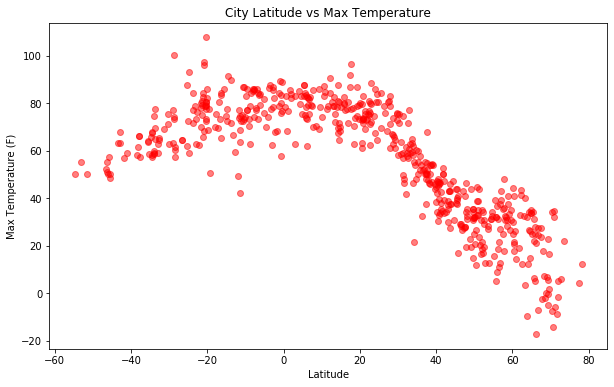

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature')
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

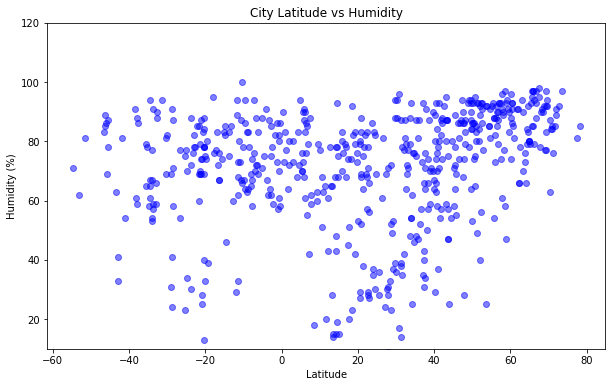

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

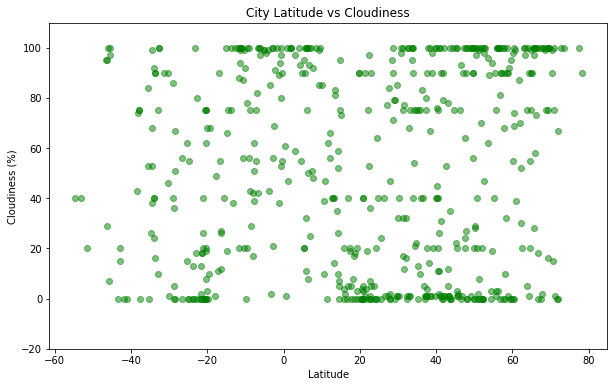

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='green', alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

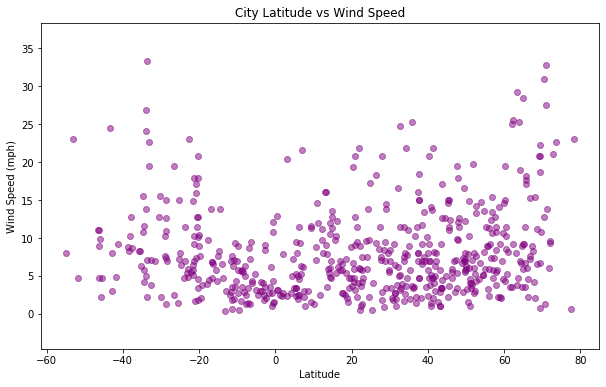

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='purple', alpha=0.5)
plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed')
plt.savefig("LatVsWind.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
# Note to teacher- I would love to figure this one out- too much copy and paste going on below....

In [24]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = WeatherPy_df.loc[pd.to_numeric(WeatherPy_df["Lat"]).astype(float) > 0, :]
southern_df = WeatherPy_df.loc[pd.to_numeric(WeatherPy_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.16x + 93.53
The r-squared is: -0.906375770470164


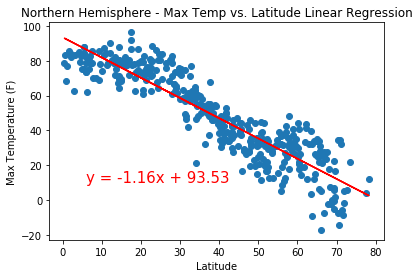

In [28]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("NorthTmpVsLatLinReg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.5x + 82.72
The r-squared is: 0.5743117051290472


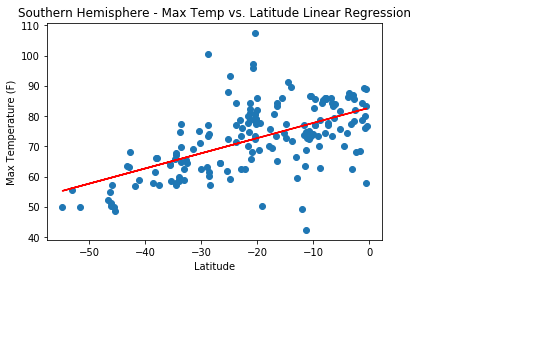

In [29]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("SouthTmpVsLatLinReg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.42x + 55.51
The r-squared is: 0.3958470892204137


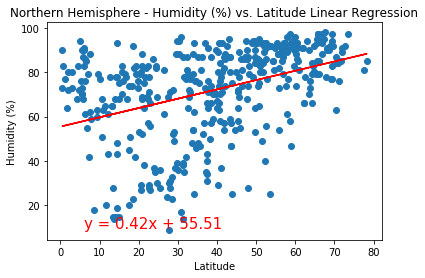

In [30]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("NorthHumVsLatLinReg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.1x + 72.77
The r-squared is: 0.07566017044622185


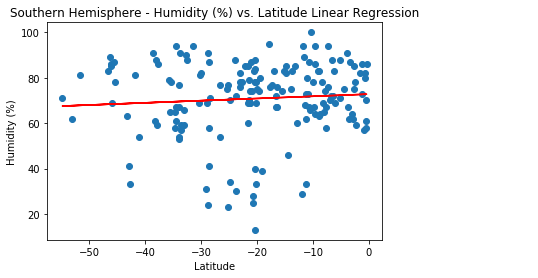

In [31]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("SouthHumVsLatLinReg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.31x + 37.76
The r-squared is: 0.15005095534896074


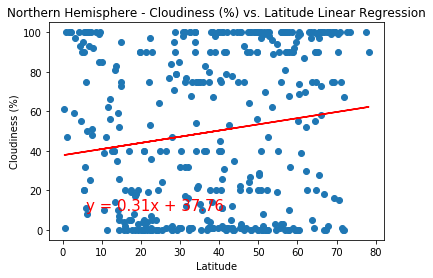

In [32]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("NorthCloudVsLatLinReg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.73x + 66.82
The r-squared is: 0.2622351264135351


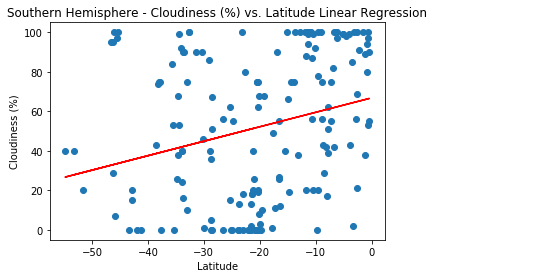

In [33]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("SouthCloudVsLatLinReg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.07x + 5.37
The r-squared is: 0.24595210500399745


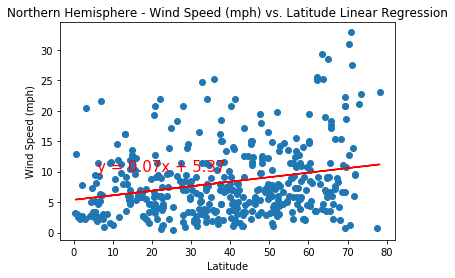

In [34]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("NorthWindVsLatLinReg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.17x + 4.1
The r-squared is: -0.3996929925061888


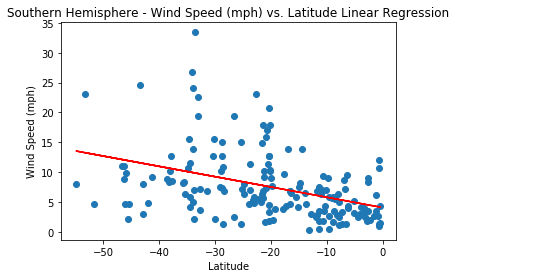

In [35]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("SouthWindVsLatLinReg.png")
plt.show()